In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode,iplot,plot
# init_notebook_mode(connected=True) 

# File to Load 
file_to_load = 'Data Sets/Latest Netflix data with 26+ joined attributes/netflix-rotten-tomatoes-metacritic-imdb.csv'
netflix_metacritic = pd.read_csv(file_to_load)

In [38]:
netflix_metacritic.head()
netflix_metacritic_subset = netflix_metacritic[['Title','Genre','Languages','Country Availability','Director', 'Series or Movie']]
netflix_metacritic_subset.columns = ['Title','Genre','Languages','Country','Director','Series or Movie']

netflix_country_split = netflix_metacritic_subset.Country.str.split(',')
series = netflix_country_split.apply(pd.Series, 1)
stacked = series.stack()
drop = stacked.index = stacked.index.droplevel(-1)
df = pd.DataFrame(stacked)
df = df.join(netflix_metacritic_subset)
del df['Country']
df.columns = ['Country','Title','Genre','Languages','Director','Media Type']
df = df.reset_index(drop=True)
df.to_csv('Data Sets/G3_Netflix_by_Country.csv', index = False)
df

,Country,Title,Genre,Languages,Director,Media Type
0,Thailand,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Tomas Alfredson,Series
1,Canada,HOW TO BUILD A GIRL,Comedy,English,Coky Giedroyc,Movie
2,Canada,Centigrade,"Drama, Thriller",English,Brendan Walsh,Movie
3,Belgium,ANNE+,Drama,Turkish,NaN,Series
4,Netherlands,ANNE+,Drama,Turkish,NaN,Series
...,...,...,...,...,...,...
195580,Brazil,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN,Series
195581,Netherlands,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN,Series
195582,Italy,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN,Series
195583,Israel,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN,Series


In [39]:
media_bycountry = df.groupby(['Country','Media Type'])['Title'].nunique()
media_bycountry = pd.DataFrame(media_bycountry)
media_bycountry = media_bycountry.reset_index()
media_bycountry

,Country,Media Type,Title
0,Argentina,Movie,3356
1,Argentina,Series,1754
2,Australia,Movie,3721
3,Australia,Series,2066
4,Belgium,Movie,3580
...,...,...,...
67,Turkey,Series,1737
68,United Kingdom,Movie,4102
69,United Kingdom,Series,2171
70,United States,Movie,3633


In [40]:
happynetflix_merge = pd.merge(media_bycountry, world_happiness_report_sub, on='Country',how='inner')
happynetflix_merge.columns = ['Country','Media Type','Media Count','Region','Happiness Score']
happynetflix_merge = happynetflix_merge[['Region','Country','Happiness Score','Media Type','Media Count']]
happynetflix_merge

,Region,Country,Happiness Score,Media Type,Media Count
0,Latin America and Caribbean,Argentina,5.929,Movie,3356
1,Latin America and Caribbean,Argentina,5.929,Series,1754
2,North America and ANZ,Australia,7.183,Movie,3721
3,North America and ANZ,Australia,7.183,Series,2066
4,Western Europe,Belgium,6.834,Movie,3580
...,...,...,...,...,...
65,Middle East and North Africa,Turkey,4.948,Series,1737
66,Western Europe,United Kingdom,7.064,Movie,4102
67,Western Europe,United Kingdom,7.064,Series,2171
68,North America and ANZ,United States,6.951,Movie,3633


In [41]:
media_bycountry = happynetflix_merge[['Country','Happiness Score','Media Type','Media Count']]
movies_bycountry = media_bycountry[media_bycountry['Media Type'] == 'Movie']
movies_bycountry
movies_byhappy = pd.merge(movies_bycountry,world_happiness_report_sub,on=['Country'], how='outer')
movies_byhappy = movies_byhappy.drop('Happiness Score', axis=1)
movies_byhappy.columns = ['Country','Media Type','Media Count','Region','Happiness Score']
movies_byhappy = movies_byhappy.sort_values('Happiness Score', ascending = False)
movies_byhappy

,Country,Media Type,Media Count,Region,Happiness Score
35,Finland,NaN,NaN,Western Europe,7.842
36,Denmark,NaN,NaN,Western Europe,7.620
30,Switzerland,Movie,3511.0,Western Europe,7.571
11,Iceland,Movie,3389.0,Western Europe,7.554
19,Netherlands,Movie,3243.0,Western Europe,7.464
...,...,...,...,...,...
144,Lesotho,NaN,NaN,Sub-Saharan Africa,3.512
145,Botswana,NaN,NaN,Sub-Saharan Africa,3.467
146,Rwanda,NaN,NaN,Sub-Saharan Africa,3.415
147,Zimbabwe,NaN,NaN,Sub-Saharan Africa,3.145


Text(0.5, 0, 'Happiness Score')

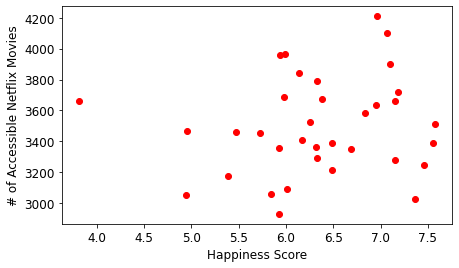

In [165]:
y_values = movies_byhappy['Media Count']
x_values = movies_byhappy['Happiness Score']
colors = {'Western Europe': 'blue', 'North America and ANZ': 'red',
       'Middle East and North Africa': 'gold', 'Latin America and Caribbean': 'green',
       'Central and Eastern Europe':'lightskyblue', 'East Asia':'maroon', 'Southeast Asia':'navy',
       'Commonwealth of Independent States': 'pink', 'Sub-Saharan Africa':'Orange',
       'South Asia':'teal'}

fig = plt.subplots(figsize=(7,4))
plt.rc('font', size=12) 
# color = ['blue', 'red', 'gold', 'green', 'lightskyblue', 'maroon', 'navy', 'pink', 'orange', 'teal']
movie_plot = plt.scatter(x_values,y_values,c='red')
# movie_plot = plt.scatter(x_values,y_values, c=movies_byhappy['Region'].map(colors))

plt.ylabel('# of Accessible Netflix Movies')
plt.xlabel('Happiness Score')


# markers = [movie_plot for color in colors]
# legend = plt.legend(markers,colors.keys(),loc='upper left',title="Region")
# # legend.legendHandles[0].set_color(color[0])
# # legend.legendHandles[1].set_color(color[1])
# # legend.legendHandles[2].set_color(color[2])
# # legend.legendHandles[3].set_color(color[3])
# # legend.legendHandles[4].set_color(color[4])
# # legend.legendHandles[5].set_color(color[5])
# # legend.legendHandles[6].set_color(color[6])
# # legend.legendHandles[7].set_color(color[7])
# # legend.legendHandles[8].set_color(color[8])
# # legend.legendHandles[9].set_color(color[9])

In [57]:
tv_bycountry = media_bycountry[media_bycountry['Media Type'] == 'Series']
tv_byhappy = pd.merge(tv_bycountry,world_happiness_report_sub,on=['Country'], how='outer')
tv_byhappy = tv_byhappy.drop('Happiness Score', axis=1)
tv_byhappy.columns = ['Country','Media Type','Media Count','Region','Happiness Score']
tv_byhappy = tv_byhappy.sort_values('Happiness Score', ascending = False)
tv_byhappy

,Country,Media Type,Media Count,Region,Happiness Score
35,Finland,NaN,NaN,Western Europe,7.842
36,Denmark,NaN,NaN,Western Europe,7.620
30,Switzerland,Series,1932.0,Western Europe,7.571
11,Iceland,Series,1944.0,Western Europe,7.554
19,Netherlands,Series,1753.0,Western Europe,7.464
...,...,...,...,...,...
144,Lesotho,NaN,NaN,Sub-Saharan Africa,3.512
145,Botswana,NaN,NaN,Sub-Saharan Africa,3.467
146,Rwanda,NaN,NaN,Sub-Saharan Africa,3.415
147,Zimbabwe,NaN,NaN,Sub-Saharan Africa,3.145


Text(0.5, 0, 'Happiness Score')

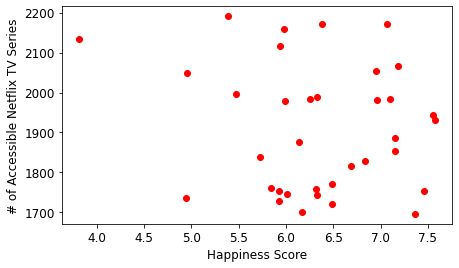

In [166]:
y_values = tv_byhappy['Media Count']
x_values = tv_byhappy['Happiness Score']
colors = {'Western Europe': 'blue', 'North America and ANZ': 'red',
       'Middle East and North Africa': 'gold', 'Latin America and Caribbean': 'green',
       'Central and Eastern Europe':'lightskyblue', 'East Asia':'maroon', 'Southeast Asia':'navy',
       'Commonwealth of Independent States': 'pink', 'Sub-Saharan Africa':'Orange',
       'South Asia':'teal'}


fig = plt.subplots(figsize=(7,4))
plt.rc('font', size=12) 
# color = ['blue', 'red', 'gold', 'green', 'lightskyblue', 'maroon', 'navy', 'pink', 'orange', 'teal']
plt.scatter(x_values,y_values, c='red')
# plt.scatter(x_values,y_values, c=movies_byhappy['Region'].map(colors))

plt.ylabel('# of Accessible Netflix TV Series')
plt.xlabel('Happiness Score')

# markers = [movie_plot for color in colors]
# legend = plt.legend(markers,colors.keys(),loc='center left',title="Region")
# legend.legendHandles[0].set_color(color[0])
# legend.legendHandles[1].set_color(color[1])
# legend.legendHandles[2].set_color(color[2])
# legend.legendHandles[3].set_color(color[3])
# legend.legendHandles[4].set_color(color[4])
# legend.legendHandles[5].set_color(color[5])
# legend.legendHandles[6].set_color(color[6])
# legend.legendHandles[7].set_color(color[7])
# legend.legendHandles[8].set_color(color[8])
# legend.legendHandles[9].set_color(color[9])

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

Country
United Kingdom    6273
Czech Republic    6192
Japan             6077
Hungary           5945
Canada            5887
Singapore         5847
Thailand          5842
India             5792
Australia         5787
Slovakia          5776
Romania           5719
United States     5686
South Africa      5518
Germany           5513
Lithuania         5509
Russia            5454
Switzerland       5443
Belgium           5408
Malaysia          5364
Iceland           5333
Greece            5291
France            5168
Israel            5167
Mexico            5120
Italy             5112
Poland            5110
Argentina         5110
Brazil            5032
Netherlands       4996
Spain             4986
Colombia          4839
South Korea       4815
Turkey            4790
Sweden            4724
Portugal          4657
Name: Media Count, dtype: int64

<AxesSubplot:xlabel='Country'>

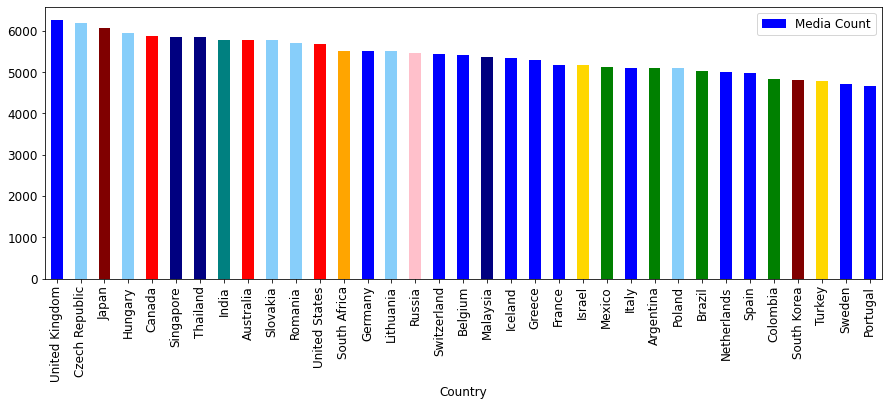

In [182]:
country_avg_media_count = happynetflix_merge[['Country','Media Count','Region']]
country_avg_media_count = round(country_avg_media_count.groupby(['Region','Country'])['Media Count'].sum(),1)
country_avg_media_count = country_avg_media_count.sort_values(0,ascending=False)
country_avg_media_count = country_avg_media_count.reset_index()
country_avg_media_count.plot(x='Country',y='Media Count',color=country_avg_media_count['Region'].map(colors), kind='bar', figsize=(15,5))

# plt.ylabel('# of Available Media on Netflix')
# plt.ylim(2400,6500)

,Region,Country,Netflix Access
0,Latin America and Caribbean,Argentina,1
1,Latin America and Caribbean,Argentina,1
2,North America and ANZ,Australia,1
3,North America and ANZ,Australia,1
4,Western Europe,Belgium,1
...,...,...,...
65,Middle East and North Africa,Turkey,1
66,Western Europe,United Kingdom,1
67,Western Europe,United Kingdom,1
68,North America and ANZ,United States,1


In [48]:
all_countries = world_happiness_report_sub[['Region','Country']].copy()
netflix_access = pd.merge(netflix_countries,all_countries,on=['Region','Country'], how='outer')
netflix_access = netflix_access.fillna(0)
netflix_access = netflix_access.drop_duplicates(subset='Country', keep='first')
netflix_access = netflix_access.reset_index(drop=True)
netflix_access
netflix_access.to_csv(r'netflix_access.csv')

NameError: name 'go' is not defined

In [52]:
# File to Load 
file_to_load_two = 'Data Sets/Netflix Subscribers and Revenue by Country/DataNetflixRevenue2020_V2.csv'
netflix_subscribers_country= pd.read_csv(file_to_load_two)

In [27]:
netflix_subscribers_country.head()
netflix_rev_region = netflix_subscribers_country.groupby(['Area','Years']).sum('Subscribers')
netflix_rev_region

Revenue
Area                            Years                
Asia-Pacific                    Q1 - 2018   199117000
                                Q1 - 2019   319602000
                                Q1 - 2020   483660000
                                Q2 - 2018   221252000
                                Q2 - 2019   349494000
                                Q2 - 2020   569140000
                                Q3 - 2018   248691000
                                Q3 - 2019   382304000
                                Q4 - 2018   276756000
                                Q4 - 2019   418121000
Europe,  Middle East and Africa Q1 - 2018   886649000
                                Q1 - 2019  1233379000
                                Q1 - 2020  1723474000
                                Q2 - 2018   975497000
                                Q2 - 2019  1319087000
                                Q2 - 2020  1892537000
                                Q3 - 2018  1004749000
                                Q3 - 2019  1428040000
                                Q4 - 2018  1096812000
                                Q4 - 2019  1562561000
Latin America                   Q1 - 2018   540182000
                                Q1 - 2019   630472000
                                Q1 - 2020   793453000
                                Q2 - 2018   568071000
                                Q2 - 2019   677136000
                                Q2 - 2020   785368000
                                Q3 - 2018   562307000
                                Q3 - 2019   741434000
                                Q4 - 2018   567137000
                                Q4 - 2019   746392000
United States and Canada        Q1 - 2018  1976157000
                                Q1 - 2019  2256851000
                                Q1 - 2020  2702776000
                                Q2 - 2018  2049546000
                                Q2 - 2019  2501199000
                                Q2 - 2020  2839670000
                                Q3 - 2018  2094850000
                                Q3 - 2019  2621250000
                                Q4 - 2018  2160979000
                                Q4 - 2019  2671908000

In [28]:
# File to Load 
file_to_load_three = 'Data Sets/Netflix Subscribers and Revenue by Country/DataNetflixSubscriber2020_V2.csv'
netflix_subscribers_revenue = pd.read_csv(file_to_load_three)

In [29]:
netflix_subscribers_revenue.head()

netflix_subs_region = netflix_subscribers_revenue.groupby(['Area','Years']).sum('Subscribers')
netflix_subs_region

Subscribers
Area                            Years                 
Asia-Pacific                    Q1 - 2018      7394000
                                Q1 - 2019     12141000
                                Q1 - 2020     19835000
                                Q2 - 2018      8372000
                                Q2 - 2019     12942000
                                Q2 - 2020     22492000
                                Q3 - 2018      9461000
                                Q3 - 2019     14485000
                                Q4 - 2018     10607000
                                Q4 - 2019     16233000
Europe,  Middle East and Africa Q1 - 2018     29339000
                                Q1 - 2019     42542000
                                Q1 - 2020     58734000
                                Q2 - 2018     31317000
                                Q2 - 2019     44229000
                                Q2 - 2020     61483000
                                Q3 - 2018     33836000
                                Q3 - 2019     47355000
                                Q4 - 2018     37818000
                                Q4 - 2019     51778000
Latin America                   Q1 - 2018     21260000
                                Q1 - 2019     27547000
                                Q1 - 2020     34318000
                                Q2 - 2018     22795000
                                Q2 - 2019     27890000
                                Q2 - 2020     36068000
                                Q3 - 2018     24115000
                                Q3 - 2019     29380000
                                Q4 - 2018     26077000
                                Q4 - 2019     31417000
United States and Canada        Q1 - 2018     60909000
                                Q1 - 2019     66633000
                                Q1 - 2020     69969000
                                Q2 - 2018     61870000
                                Q2 - 2019     66501000
                                Q2 - 2020     72904000
                                Q3 - 2018     63010000
                                Q3 - 2019     67114000
                                Q4 - 2018     64757000
                                Q4 - 2019     67662000

In [30]:
# File to Load 
file_to_load_four = 'Data Sets/Netflix Subscribers and Revenue by Country/NetflixsRevenue2018toQ2_2020.csv'
Netflix_revenue_country = pd.read_csv(file_to_load_four)

In [31]:
Netflix_revenue_country 

,Area,Q1 - 2018,Q2 - 2018,Q3 - 2018,Q4 - 2018,Q1 - 2019,Q2 - 2019,Q3 - 2019,Q4 - 2019,Q1 - 2020,Q2 - 2020
0,United States and Canada,1976157000,2049546000,2094850000,2160979000,2256851000,2501199000,2621250000,2671908000,2702776000,2839670000
1,"Europe, Middle East, and Africa",886649000,975497000,1004749000,1096812000,1233379000,1319087000,1428040000,1562561000,1723474000,1892537000
2,Latin America,540182000,568071000,562307000,567137000,630472000,677136000,741434000,746392000,793453000,785368000
3,Asia-Pacific,199117000,221252000,248691000,276756000,319602000,349494000,382304000,418121000,483660000,569140000


In [32]:
# File to Load 
file_to_load_five = 'Data Sets/Netflix Subscribers and Revenue by Country/NetflixSubscribersbyCountryfrom2018toQ2_2020.csv'
netflix_subscribers_country_v = pd.read_csv(file_to_load_five)

In [33]:
netflix_subscribers_country_v.head()

,Area,Q1 - 2018,Q2 - 2018,Q3 - 2018,Q4 - 2018,Q1 - 2019,Q2 - 2019,Q3 - 2019,Q4 - 2019,Q1 - 2020,Q2 - 2020
0,United States and Canada,60909000,61870000,63010000,64757000,66633000,66501000,67114000,67662000,69969000,72904000
1,"Europe, Middle East, and Africa",29339000,31317000,33836000,37818000,42542000,44229000,47355000,51778000,58734000,61483000
2,Latin America,21260000,22795000,24115000,26077000,27547000,27890000,29380000,31417000,34318000,36068000
3,Asia-Pacific,7394000,8372000,9461000,10607000,12141000,12942000,14485000,16233000,19835000,22492000


In [34]:
# File to Load 
file_to_load_h = 'Data Sets/World Happiness Report/world-happiness-report-2021.csv'
world_happiness_report = pd.read_csv(file_to_load_h)

In [35]:
world_happiness_report.head()
world_happiness_report_sub = world_happiness_report[['Country name','Regional indicator','Ladder score']]
world_happiness_report_sub.columns = ['Country','Region','Ladder Score']
world_happiness_report_sub

,Country,Region,Ladder Score
0,Finland,Western Europe,7.842
1,Denmark,Western Europe,7.620
2,Switzerland,Western Europe,7.571
3,Iceland,Western Europe,7.554
4,Netherlands,Western Europe,7.464
...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512
145,Botswana,Sub-Saharan Africa,3.467
146,Rwanda,Sub-Saharan Africa,3.415
147,Zimbabwe,Sub-Saharan Africa,3.145


In [36]:
# File to Load 
file_to_load_r = 'Data Sets/World Happiness Report/world-happiness-report.csv'
world_happiness_report_t= pd.read_csv(file_to_load_r)

In [138]:
world_happiness_report_t

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [148]:
netflix_metacritic.head()
netflix_metacritic_subset = netflix_metacritic[['Title','Genre','Languages','Country Availability','Director', 'Series or Movie']]
netflix_metacritic_subset.columns = ['Title','Genre','Languages','Country','Director','Series or Movie']

netflix_country_split = netflix_metacritic_subset.Country.str.split(',')
series = netflix_country_split.apply(pd.Series, 1)
stacked = series.stack()
drop = stacked.index = stacked.index.droplevel(-1)
df = pd.DataFrame(stacked)
df = df.join(netflix_metacritic_subset)
del df['Country']
df.columns = ['Country','Title','Genre','Languages','Director','Media Type']
df = df.reset_index(drop=True)
netflix_country_stacked = df
netflix_country_stacked

,Country,Title,Genre,Languages,Director,Media Type
0,Thailand,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Tomas Alfredson,Series
1,Canada,HOW TO BUILD A GIRL,Comedy,English,Coky Giedroyc,Movie
2,Canada,Centigrade,"Drama, Thriller",English,Brendan Walsh,Movie
3,Belgium,ANNE+,Drama,Turkish,NaN,Series
4,Netherlands,ANNE+,Drama,Turkish,NaN,Series
...,...,...,...,...,...,...
195580,Brazil,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN,Series
195581,Netherlands,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN,Series
195582,Italy,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN,Series
195583,Israel,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN,Series


In [159]:
netflix_genre_split = netflix_country_stacked.Genre.str.split(',')
series = netflix_genre_split.apply(pd.Series, 1)
stacked = series.stack()
drop = stacked.index = stacked.index.droplevel(-1)
df2 = pd.DataFrame(stacked)
df2 = df2.join(df)
del df2['Genre']
df2.columns = ['Genre','Country','Title','Languages','Director','Media Type']
df2 = df2.reset_index(drop=True)
df2.to_csv('genre_stacked.csv')